In [1]:
from torchvision.datasets import ImageFolder
import torch
import torch.nn as nn
import torch.nn.functional
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from myDataset import MyDataset

In [2]:
train_path = r'./datasets/train'
test_path = r'./datasets/test'

In [3]:
train_datasets = MyDataset(train_path,80).getDatasets()
test_datasets = MyDataset(test_path,80).getDatasets()

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self, in_dim, hidden_size, out_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(in_features=in_dim, out_features=hidden_size),
            nn.ReLU()
           
        )
        self.decoder = nn.Sequential(
            nn.Linear(in_features=hidden_size, out_features=out_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoder_out = self.encoder(x)
        decoder_out = self.decoder(encoder_out)
        return encoder_out, decoder_out

In [5]:
autoEncoder = torch.load('sae_modal.pt')

In [6]:
train_datasets_loader = torch.utils.data.DataLoader(train_datasets)
test_datasets_loader = torch.utils.data.DataLoader(test_datasets)

In [7]:
def loader_to_numpy(datasets_loader):
    # 将DataLoader加载形式的数据转换成 numpy的形式，
    # 便于后面svm的训练
    #
    data_list = []
    label_list = []
    for data, label in datasets_loader:
        data_ = data.view(1,-1)
        encoder, decoder = autoEncoder(data_)
        
        data_list.append(encoder.detach().numpy().tolist())
        label_list.append(label)
        
    data_np = np.array(data_list).reshape((len(data_list),-1))
    label_np = np.array(label_list).reshape((len(label_list),-1))

    return data_np, label_np

# SVM

In [8]:
train_data,train_label = loader_to_numpy(train_datasets_loader)
#创建svm, 核函数为高斯函数
classifier = svm.SVC(gamma=0.005)
#训练svm
classifier.fit(train_data,train_label)

SVC(gamma=0.005)

In [9]:
train_data[0].reshape((1,-1)).shape

(1, 120)

In [10]:
classifier.predict(train_data[0].reshape((1,-1)))

array([0], dtype=int64)

## svm模型评价

In [11]:
train_predict = classifier.predict(train_data)
print(classification_report(train_predict,train_label))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1064
           1       0.93      1.00      0.97       531

    accuracy                           0.98      1595
   macro avg       0.97      0.98      0.97      1595
weighted avg       0.98      0.98      0.98      1595



In [12]:
#转换数据
test_data, test_label = loader_to_numpy(test_datasets_loader)
#训练好的svm，对测试集进行预测
test_predict = classifier.predict(test_data)

In [13]:
print(classification_report(test_predict,test_label))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       606
           1       0.46      0.87      0.60       119

    accuracy                           0.81       725
   macro avg       0.72      0.84      0.74       725
weighted avg       0.89      0.81      0.83       725



# PSO-SVM

In [14]:
import pso_svm

In [15]:
data = [train_data,test_data,train_label,test_label]

## pso-svm训练

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
-------开始--------


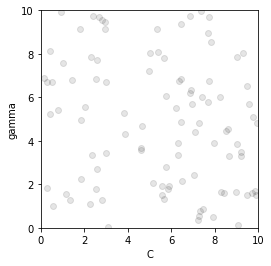

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [2.32682853 3.34512179]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [2.03487019 5.53458385]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [1.86448128 2.23320862]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [7.96828382 3.90882567]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [9.00611525 3.83238077]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [9.9078006 1.5279077]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [6.21961247 5.5189662 ]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [8.42765653 1.60606843]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [9.48720503 1.48946501]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [5.64376763 1

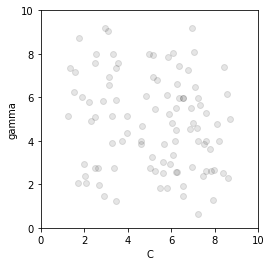

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [3.25865894 3.88610417]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [3.25155972 5.13548764]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [2.04626835 2.39416848]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [7.59054633 3.9964508 ]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [8.20941329 3.98727364]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [8.6021301  2.30860573]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [6.19238108 5.50463364]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [7.46226575 2.38847744]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [7.80354915 2.59669435]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [5.48662959

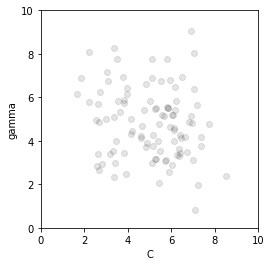

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [3.47282842 4.01044216]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [3.36554432 5.09809862]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [3.3318267 3.5324414]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [6.39482275 4.27382713]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [7.34329295 4.15566268]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [8.50896135 2.36431401]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [5.54940509 5.1662192 ]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [6.35110119 3.28903002]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [6.98905223 3.13233523]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [5.41856231 2

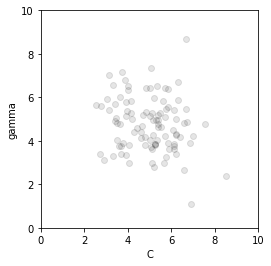

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [3.49487202 4.02323977]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [3.46892761 5.06418703]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [3.5717548  3.74488113]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [6.22206148 4.31390318]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [6.98906789 4.22453026]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [8.49898192 2.370281  ]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [5.13637186 4.94882942]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [6.23221308 3.38538388]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [5.84957734 3.88169266]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [5.19117615

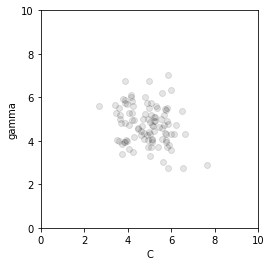

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [3.50175498 4.02723573]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [3.61971728 5.01472528]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [3.8935052  4.02976883]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [6.12612697 4.33615746]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [6.61039657 4.29815063]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [7.64682769 2.87980858]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [5.00839509 4.88147203]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [5.98263702 3.58765487]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [5.73717802 3.95561027]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.91602789

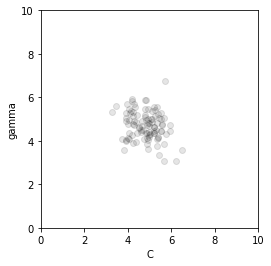

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [4.06443817 4.35390643]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [3.92826807 4.91351503]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [4.18307429 4.28616221]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [5.53978716 4.47217283]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [5.93321332 4.42980697]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [6.49079442 3.5710342 ]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [4.91699227 4.83336442]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [5.34681593 4.10296138]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [5.38543509 4.18692838]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.88262751

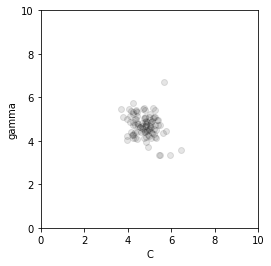

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [4.15018799 4.40368924]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [4.0938037  4.85921634]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [4.34187002 4.42676483]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [5.21113498 4.54841146]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [5.76686509 4.46214799]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [6.44307173 3.59956897]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [4.82454812 4.78470874]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [5.28806213 4.15057888]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [5.19666155 4.31107228]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.85187061

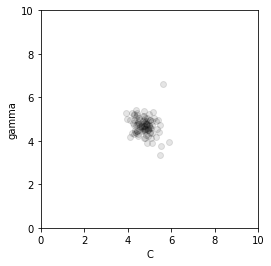

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [4.30887523 4.49581653]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [4.21174311 4.82053008]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [4.39497964 4.47378973]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [5.05898552 4.58370612]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [5.3168701  4.54963493]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [5.88981169 3.93037909]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [4.81592969 4.78017264]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [5.2726357  4.16308136]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [5.11485082 4.36487379]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.79449781

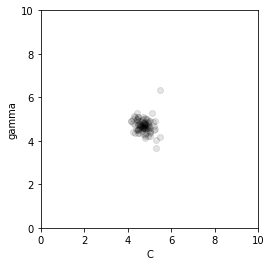

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [4.37703459 4.53538705]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [4.22335229 4.81672206]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [4.50151104 4.5681159 ]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [5.03796472 4.5885824 ]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [5.26423173 4.55986876]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [5.49240181 4.16800192]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [4.74811023 4.74447755]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [5.01163312 4.37461308]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [4.92366539 4.49060383]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.79159482

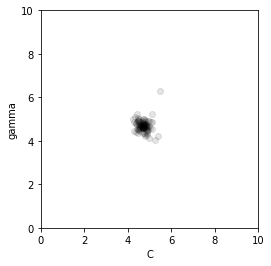

error of particle- 0 is (training, test) (33, 139)  At (gamma, c):  [4.63119515 4.68294221]
error of particle- 1 is (training, test) (33, 139)  At (gamma, c):  [4.42503024 4.56325135]
error of particle- 2 is (training, test) (33, 139)  At (gamma, c):  [4.35917111 4.77217102]
error of particle- 3 is (training, test) (33, 139)  At (gamma, c):  [4.5518313  4.61267101]
error of particle- 4 is (training, test) (33, 139)  At (gamma, c):  [4.90823136 4.61867711]
error of particle- 5 is (training, test) (33, 139)  At (gamma, c):  [4.99540305 4.61213378]
error of particle- 6 is (training, test) (33, 139)  At (gamma, c):  [5.37675436 4.23715086]
error of particle- 7 is (training, test) (33, 139)  At (gamma, c):  [4.7361831 4.7382   ]
error of particle- 8 is (training, test) (33, 139)  At (gamma, c):  [4.85843721 4.49877198]
error of particle- 9 is (training, test) (33, 139)  At (gamma, c):  [4.90624056 4.50206299]
error of particle- 10 is (training, test) (33, 139)  At (gamma, c):  [4.77138724 4

In [16]:
best_position=pso_svm.pso_svm(data)

In [17]:
gamma = best_position[0]
C = best_position[1]

In [18]:
svclassifier=svm.SVC(kernel='rbf', gamma = gamma, C = C )
svclassifier.fit(train_data,train_label)

SVC(C=4.682942206436604, gamma=4.631195148778028)

## pso-svm 模型评价

In [22]:
train_predict = svclassifier.predict(train_data)
print('************************训练集报告****************************')
print(classification_report(train_predict,train_label))

************************训练集报告****************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1060
           1       0.94      1.00      0.97       535

    accuracy                           0.98      1595
   macro avg       0.97      0.98      0.98      1595
weighted avg       0.98      0.98      0.98      1595



In [23]:
test_predict = svclassifier.predict(test_data)
print('************************测试集报告****************************')
print(classification_report(test_predict,test_label))

************************测试集报告****************************
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       617
           1       0.43      0.90      0.58       108

    accuracy                           0.81       725
   macro avg       0.70      0.85      0.73       725
weighted avg       0.90      0.81      0.83       725

